In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

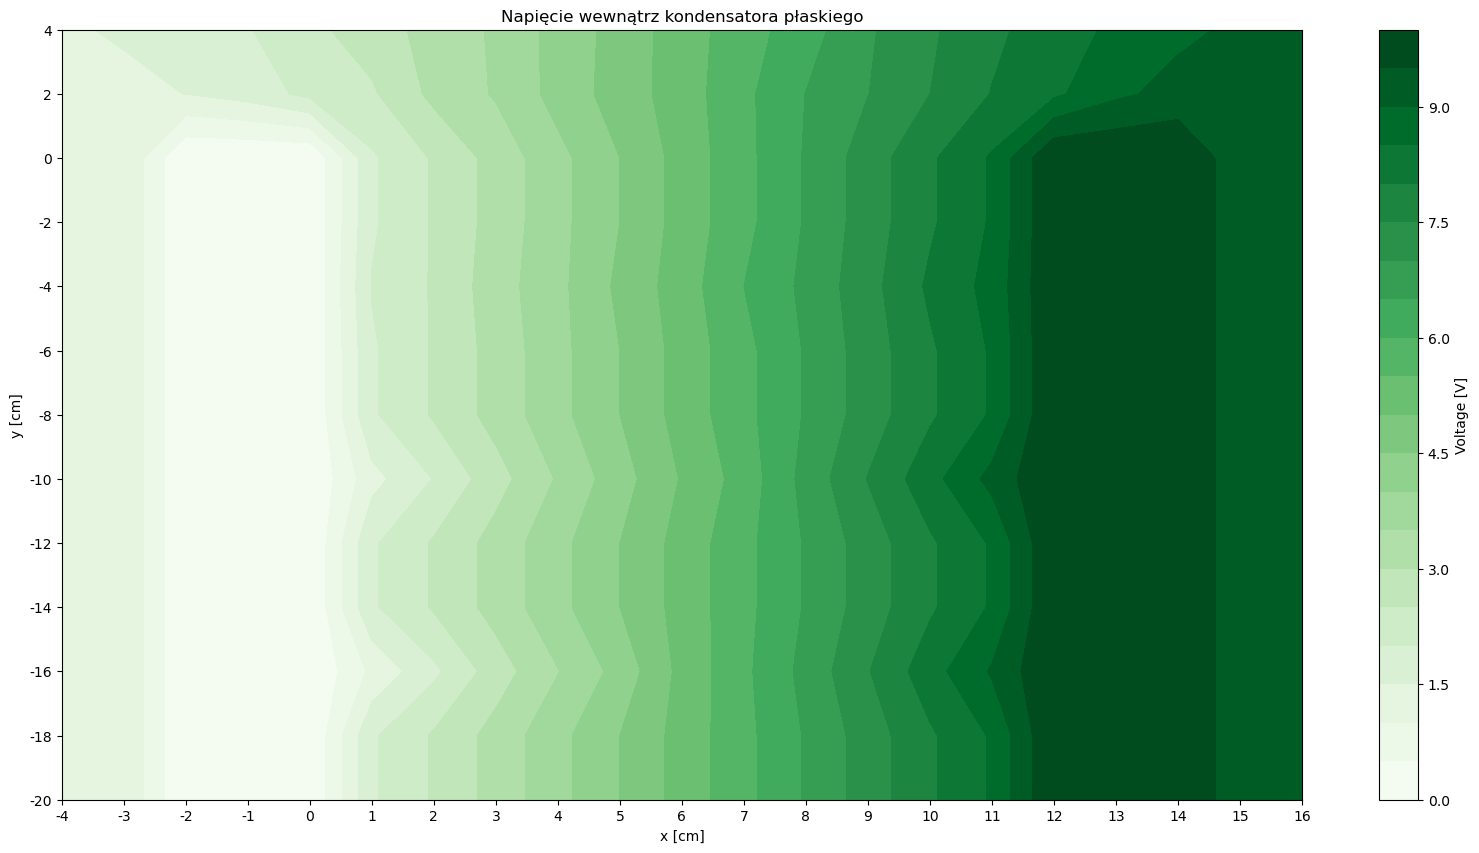

In [6]:
V = pd.read_csv('lab4.csv')
V = V.fillna(V.mean())
V = V.iloc[::-1].reset_index(drop=True)

ys, xs = V.shape

x = np.arange(xs)
y = np.arange(ys)
X, Y = np.meshgrid(x,y)

plt.figure(figsize = (20,10))
plt.contourf(X, Y, V, levels = 20, cmap = 'Greens')
plt.title('Napięcie wewnątrz kondensatora płaskiego')

x_shift = -4
y_shift = -10

plt.xticks(x, x + x_shift)
plt.yticks(y, (y + y_shift)*2)

plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.colorbar(label = 'Voltage [V]')

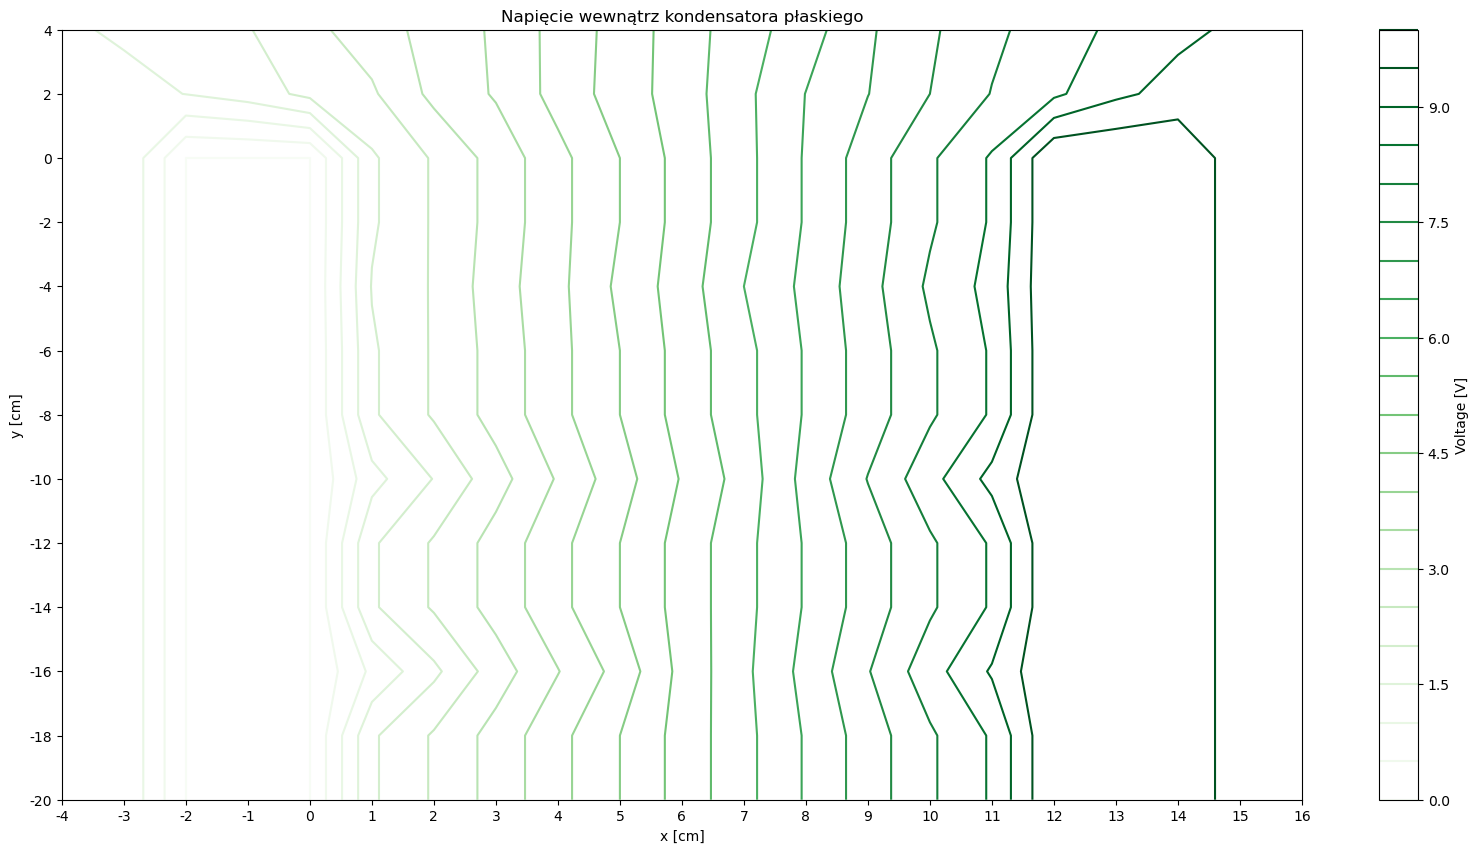

In [3]:
newV = V.iloc[1:-1]
y2, x2 = newV.shape

newX, newY = np.meshgrid(np.arange(x2), np.arange(y2))

plt.figure(figsize = (20,10))
plt.contour(X,Y, V, levels = 20, cmap = 'Greens')
plt.title('Napięcie wewnątrz kondensatora płaskiego')

x_shift = -4
y_shift = -10

plt.xticks(x, x + x_shift)
plt.yticks(y, (y + y_shift)*2)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.colorbar(label = 'Voltage [V]')


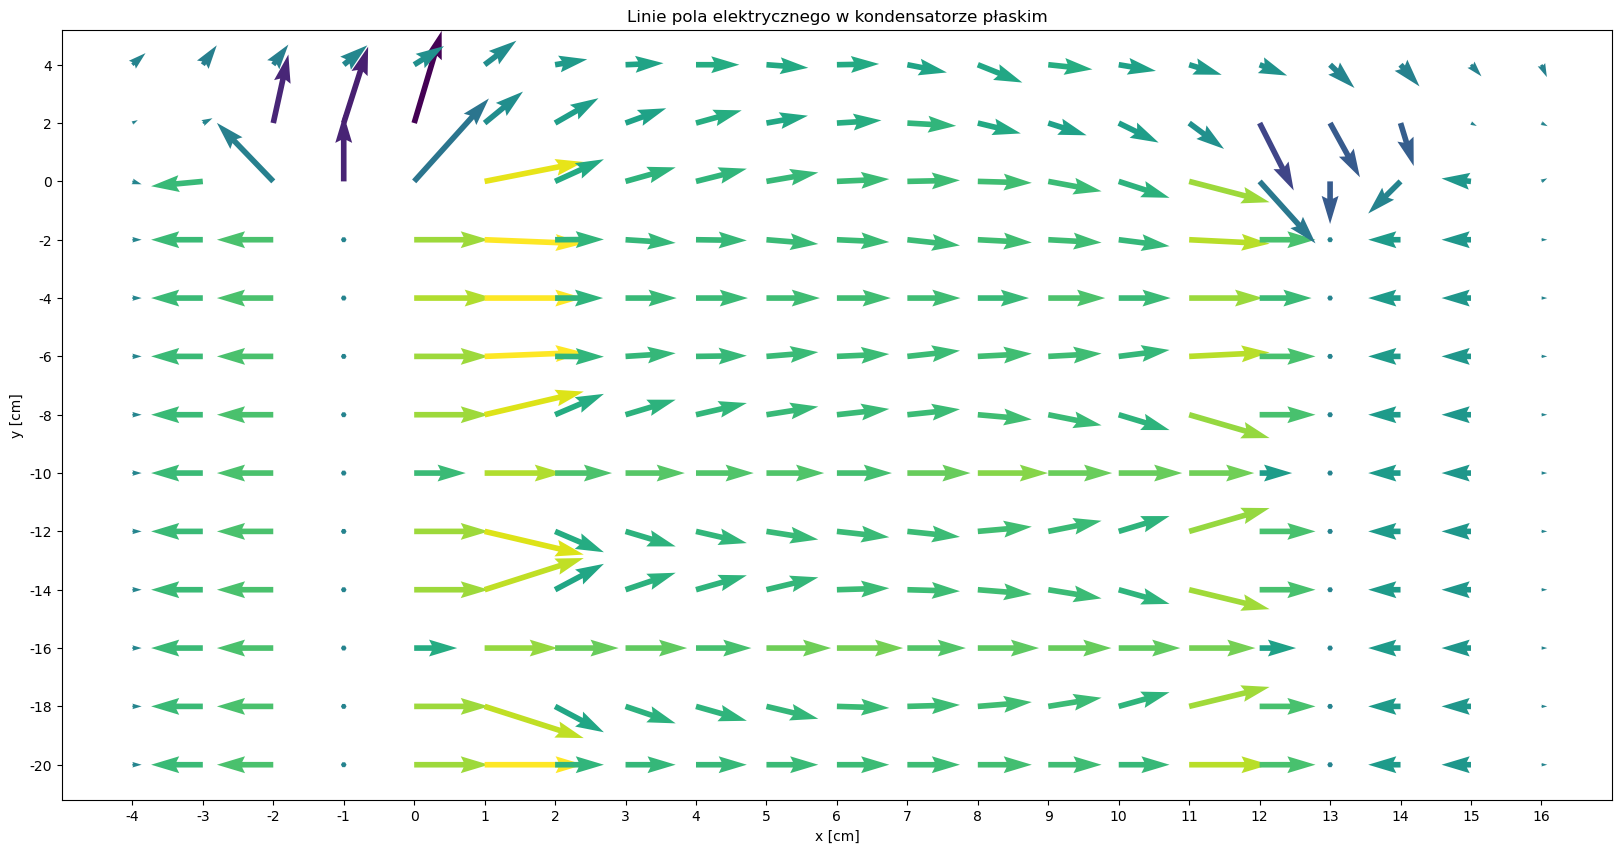

In [4]:
Ey, Ex = np.gradient(V)
fun = np.sin(Ex)**2 + np.cos(Ey)**2
plt.figure(figsize = (20,10))
plt.title('Linie pola elektrycznego w kondensatorze płaskim')

x_shift = -4
y_shift = -10

plt.xticks(x, x + x_shift)
plt.yticks(y, (y + y_shift)*2)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.quiver(X, Y, Ex, Ey, fun, color = 'green', scale = 20)